Bigrams

In [ ]:
import pandas as pd
import string
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.collocations import *
import nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/4_updated_subset_with_affiliation.csv")
data

,Journal,Title,Tag1,Tag2,Tag3,Tag4,Tag5,Compound,Authors,Year,Abstract,Paper_type,Affiliations
0,Molecules : A Journal of Synthetic Chemistry a...,Anti-Trypanosomatid Elemanolide Sesquiterpene ...,1A,2AA,NaN,NaN,Plant extract,Sesquiterpene Lactones,"Kimani, Njogu M.; Matasyoh, Josphat C.; Kaiser...",2017,Sleeping sickness or human African trypanosomi...,['Journal Article'],['Institute of Pharmaceutical Biology and Phyt...
1,Viruses,Antiviral and Cytotoxic Activity of Different ...,1B,2BB,NaN,NaN,Plant extract,NaN,"Panda, Sujogya Kumar; Castro, Ana HortÃÂªncia...",2020,Chikungunya and yellow fever virus cause vecto...,['Journal Article'],"['Department of Biology, Katholieke Universite..."
2,Molecules,Antiprotozoal Activity of Plants Used in the M...,1A,2AA,NaN,NaN,Plant extract,"Gallic acid, methyl gallate, 2,3,4,6-tetragall...","Vahekeni, Nina; Brillatz, ThÃÂ©o; Rahmaty, Ma...",2024,"Folk medicine is widely used in Angola, even f...",['Journal Article'],['Department of Medical Parasitology and Infec...
3,Molecules,Search for Antiprotozoal Activity in Herbal Me...,1A,2AA,2AB,NaN,Plant extract,NaN,"Llurba Montesino, NÃÂºria; Kaiser, Marcel; Br...",2015,"Sleeping sickness, Chagas disease, Leishmanias...",['Journal Article'],['Institut fÃÂ¼r Pharmazeutische Biologie und...
4,Plants,Medicinal Plant Preparations Administered by B...,1A,2AC,NaN,NaN,Plant extract,NaN,"Dube, Mthandazo; Raphane, Boingotlo; Sethebe, ...",2022,Schistosomiasis and soil-transmitted helminths...,['Journal Article'],"['Department of Bioorganic Chemistry, Leibniz ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,Scientifica,Photomediated Larvicidal Activity of Pheophorb...,1A,2AC,NaN,NaN,Plant compounds,NaN,"Singh, Divya Jyoti; Singh, Vinay Kumar; Singh,...",2017,Fasciolosis is a parasitic disease caused by F...,['Journal Article'],"['Malacology Laboratory, Department of Zoology..."
561,PLoS Neglected Tropical Diseases,Bacillus thuringiensis-derived Cry5B Has Poten...,1A,2AC,NaN,NaN,Microbial-derived,Bacillus thuringiensis-derived Cry5B,"Urban, Joseph F.; Hu, Yan; Miller, Melanie M.;...",2013,Ascaris suum and Ascaris lumbricoides are two ...,['Journal Article'],"['USDA, Agricultural Research Service, Beltsvi..."
562,The Journal of Venomous Animals and Toxins Inc...,Synergic effects between ocellatin-F1 and bufo...,1B,2B_,NaN,NaN,Animal-derived,"Bufotenine, ocellatin-P1 and ocellatin-F1, are...","Cunha Neto, Rene dos Santos; Vigerelli, Hugo; ...",2015,Background: Rabies is an incurable neglected z...,['Journal Article'],"['Butantan Institute, Laboratory of Biochemist..."
563,Viruses,Silvestrol Inhibits Chikungunya Virus Replicat...,1B,2BB,NaN,NaN,Plant compounds,Silvestrol,"Henss, Lisa; Scholz, Tatjana; GrÃÂ¼nweller, A...",2018,"Silvestrol, a natural compound that is isolate...",['Journal Article'],"['Paul-Ehrlich-Institut, Department of Virolog..."


In [ ]:
# Preprocessing function for abstracts
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Tokenize the text and convert to lowercase
    words = nltk.word_tokenize(text.lower())
    # Remove non-alphabetic tokens
    words = [word for word in words if word.isalpha()]
    return words

In [ ]:
# Extract bigrams from the Abstract column
data['ProcessedAbstract'] = data['Abstract'].apply(preprocess_text)
data['Bigrams'] = data['ProcessedAbstract'].apply(lambda x: list(bigrams(x)))

<ipython-input-9-826ae86a37f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ProcessedAbstract'] = data['Abstract'].apply(preprocess_text)
<ipython-input-9-826ae86a37f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bigrams'] = data['ProcessedAbstract'].apply(lambda x: list(bigrams(x)))


In [ ]:
# Flatten all bigrams and calculate their frequencies
all_bigrams = [bigram for bigrams_list in data['Bigrams'] for bigram in bigrams_list]
bigram_freq = Counter(all_bigrams)

In [ ]:
# Convert bigrams to a DataFrame for easier selection
bigram_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [ ]:
# Save bigram_df to a CSV file
bigram_df.to_csv('bigram_frequencies.csv', index=False)

In [ ]:
# Prompt for user-selected bigrams
selected_bigrams = [('essential', 'oil'),('natural', 'products'),('secondary', 'metabolites'),('selectivity', 'index'),('molecular', 'docking'),('electron', 'microscopy')]

In [ ]:
# Filter the dataset for the selected bigrams
def bigram_in_list(bigrams_list, selected):
    return [bigram for bigram in bigrams_list if bigram in selected]

In [ ]:
data['SelectedBigrams'] = data['Bigrams'].apply(lambda x: bigram_in_list(x, selected_bigrams))

<ipython-input-40-46653b2ad138>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SelectedBigrams'] = data['Bigrams'].apply(lambda x: bigram_in_list(x, selected_bigrams))


In [ ]:
# Explode the list of selected bigrams to create one row per bigram
bigram_trends = data.explode('SelectedBigrams')
bigram_trends = bigram_trends.dropna(subset=['SelectedBigrams'])
bigram_trends['SelectedBigrams'] = bigram_trends['SelectedBigrams'].apply(tuple)

In [ ]:
# Group by year and bigram, then count occurrences
bigram_trends = (
    bigram_trends.groupby(['Year', 'SelectedBigrams'])
    .size()
    .reset_index(name='Frequency')
)

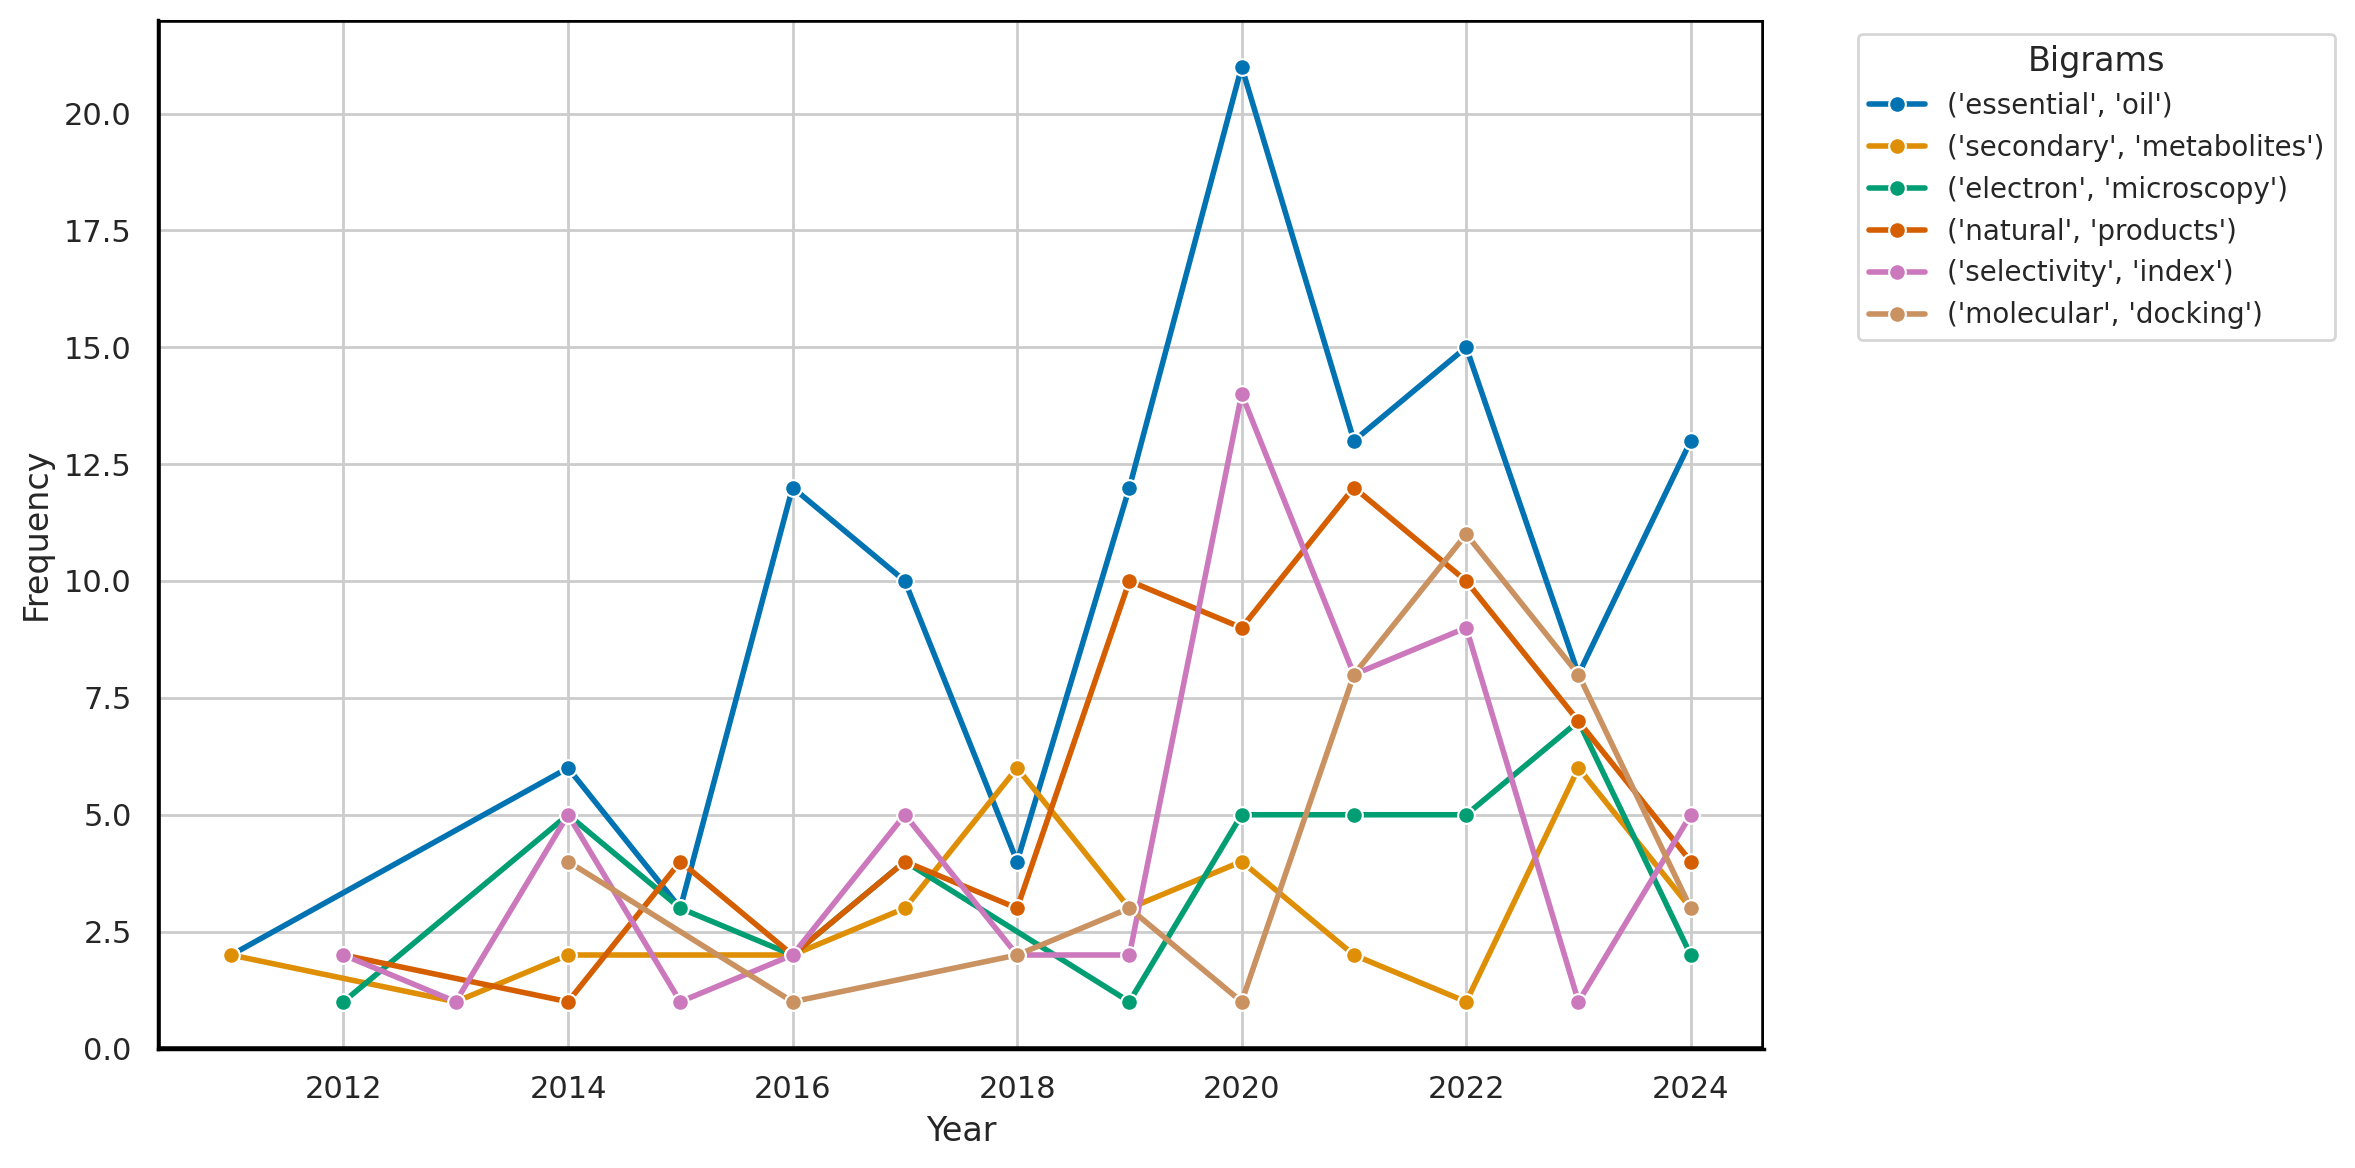

In [ ]:
# Plotting the line graph
sns.set(style="whitegrid", palette="colorblind")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=bigram_trends,
    x='Year',
    y='Frequency',
    hue='SelectedBigrams',
    marker='o',
    linewidth=2
)


plt.xlabel("Year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Bigrams", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Set x and y axis line color to dark
ax = plt.gca()  # Get the current Axes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)  # Optional: Hide top and right spines
ax.spines['right'].set_visible(False)

